<a href="https://colab.research.google.com/github/schenita/info5731/blob/master/Floyd__selfstudy11_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Schenita Floyd
# Self Study 11 - Keras

In [0]:
import pickle

In [0]:
import pandas as pd

In [0]:
with open("imdb-review.pickle", 'rb') as f:
  train, test = pickle.load(f)

In [11]:
train.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


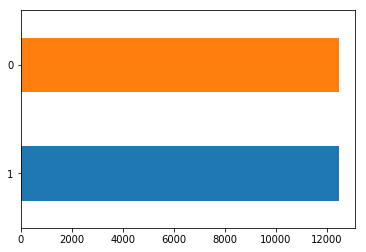

In [12]:
train.sentiment.value_counts().plot(kind='barh')

In [13]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
import numpy as np

In [0]:
num_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=num_words)

In [0]:
tokenizer.fit_on_texts(train.text)

In [0]:
train_sequences = tokenizer.texts_to_sequences(train.text)
test_sequences = tokenizer.texts_to_sequences(test.text)

In [21]:
train.text[0]

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

In [22]:
train_sequences[0]

[15,
 3,
 17,
 12,
 211,
 54,
 1158,
 47,
 249,
 23,
 3,
 173,
 4,
 903,
 4381,
 3559,
 15,
 11,
 1525,
 835,
 3,
 17,
 118,
 911,
 6,
 162,
 160,
 7262,
 6,
 3,
 133,
 1,
 106,
 6,
 32,
 1552,
 2032,
 103,
 15,
 1605,
 1,
 8595,
 1789,
 14,
 3,
 565,
 6259]

In [23]:
list(tokenizer.index_word.items())[:20]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on')]

In [24]:
len(train_sequences[0])

47

In [25]:
len(train_sequences[1])

148

In [0]:
train['text_length']=train['text'].str.len()

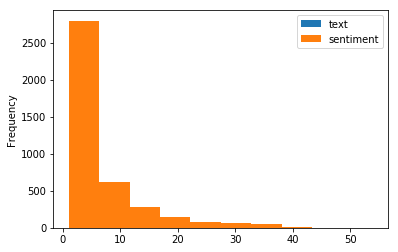

In [27]:
train.groupby(['text_length']).count().plot(kind='hist')

In [0]:
lens = [len(seq) for seq in train_sequences]

In [29]:
lens

[47,
 148,
 51,
 393,
 136,
 88,
 114,
 116,
 439,
 55,
 56,
 322,
 78,
 613,
 114,
 44,
 128,
 134,
 179,
 139,
 54,
 127,
 698,
 150,
 172,
 182,
 132,
 414,
 123,
 311,
 464,
 143,
 176,
 170,
 188,
 106,
 178,
 79,
 85,
 251,
 103,
 108,
 417,
 254,
 161,
 123,
 145,
 131,
 68,
 313,
 161,
 244,
 115,
 112,
 238,
 800,
 129,
 415,
 571,
 305,
 110,
 162,
 115,
 149,
 129,
 194,
 76,
 259,
 166,
 444,
 74,
 137,
 74,
 151,
 125,
 303,
 233,
 119,
 132,
 293,
 218,
 290,
 200,
 127,
 287,
 116,
 128,
 328,
 563,
 126,
 143,
 176,
 68,
 263,
 130,
 121,
 150,
 372,
 143,
 105,
 124,
 56,
 234,
 77,
 129,
 329,
 445,
 517,
 216,
 141,
 93,
 132,
 283,
 157,
 332,
 396,
 72,
 53,
 126,
 431,
 171,
 455,
 373,
 119,
 25,
 107,
 169,
 180,
 510,
 271,
 170,
 308,
 115,
 489,
 256,
 220,
 188,
 40,
 60,
 412,
 227,
 515,
 214,
 140,
 106,
 176,
 134,
 419,
 222,
 64,
 571,
 218,
 168,
 140,
 344,
 230,
 349,
 42,
 146,
 47,
 117,
 288,
 69,
 299,
 63,
 454,
 251,
 103,
 74,
 489,
 231,
 18

In [0]:
import matplotlib.pyplot as plt

(array([1.6757e+04, 5.8740e+03, 1.6080e+03, 5.4900e+02, 1.9500e+02,
        7.0000e+00, 6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   9. ,  227.4,  445.8,  664.2,  882.6, 1101. , 1319.4, 1537.8,
        1756.2, 1974.6, 2193. ]),
 <a list of 10 Patch objects>)

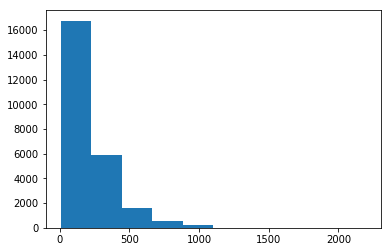

In [31]:
plt.hist(lens)

In [0]:
maxlen = 400

In [0]:
X_train = pad_sequences(train_sequences, maxlen=maxlen)

In [34]:
X_train

array([[   0,    0,    0, ...,    3,  565, 6259],
       [   0,    0,    0, ...,  297,  238,   36],
       [   0,    0,    0, ...,    5, 8926,    1],
       ...,
       [   0,    0,    0, ...,  155,    7,    7],
       [1802, 6124,   42, ...,    1, 3476, 1873],
       [   0,    0,    0, ...,  302,  339,  155]], dtype=int32)

In [35]:
X_train.shape

(25000, 400)

In [0]:
X_test = pad_sequences(test_sequences, maxlen=maxlen)

In [0]:
y_train = train.sentiment
y_test = test.sentiment

In [0]:
import spacy

In [39]:
spacy.cli.download("en_core_web_lg")


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
nlp = spacy.load("en_core_web_lg")

In [42]:
nlp.vocab["the"].vector

array([ 2.7204e-01, -6.2030e-02, -1.8840e-01,  2.3225e-02, -1.8158e-02,
        6.7192e-03, -1.3877e-01,  1.7708e-01,  1.7709e-01,  2.5882e+00,
       -3.5179e-01, -1.7312e-01,  4.3285e-01, -1.0708e-01,  1.5006e-01,
       -1.9982e-01, -1.9093e-01,  1.1871e+00, -1.6207e-01, -2.3538e-01,
        3.6640e-03, -1.9156e-01, -8.5662e-02,  3.9199e-02, -6.6449e-02,
       -4.2090e-02, -1.9122e-01,  1.1679e-02, -3.7138e-01,  2.1886e-01,
        1.1423e-03,  4.3190e-01, -1.4205e-01,  3.8059e-01,  3.0654e-01,
        2.0167e-02, -1.8316e-01, -6.5186e-03, -8.0549e-03, -1.2063e-01,
        2.7507e-02,  2.9839e-01, -2.2896e-01, -2.2882e-01,  1.4671e-01,
       -7.6301e-02, -1.2680e-01, -6.6651e-03, -5.2795e-02,  1.4258e-01,
        1.5610e-01,  5.5510e-02, -1.6149e-01,  9.6290e-02, -7.6533e-02,
       -4.9971e-02, -1.0195e-02, -4.7641e-02, -1.6679e-01, -2.3940e-01,
        5.0141e-03, -4.9175e-02,  1.3338e-02,  4.1923e-01, -1.0104e-01,
        1.5111e-02, -7.7706e-02, -1.3471e-01,  1.1900e-01,  1.08

(array([  3.,   9., 140., 133.,  13.,   0.,   1.,   0.,   0.,   1.]),
 array([-1.1241    , -0.75286996, -0.38163996, -0.01040995,  0.36082006,
         0.73205006,  1.1032801 ,  1.4745101 ,  1.8457401 ,  2.21697   ,
         2.5882    ], dtype=float32),
 <a list of 10 Patch objects>)

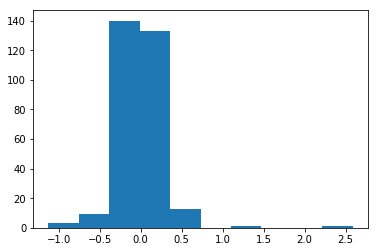

In [43]:
plt.hist(nlp.vocab["the"].vector)

In [0]:
embedding_dim = nlp.vocab.vectors_length

In [45]:
embedding_dim

300

In [46]:
nlp.vocab["you're"].vector

array([ 0.56767  , -0.062915 , -0.5527   ,  0.20808  ,  0.76667  ,
       -0.33901  , -0.59938  ,  0.040888 , -0.32349  , -0.9363   ,
       -0.1223   , -0.078781 ,  0.0023124, -0.0053164,  0.63593  ,
       -0.7781   ,  0.24667  , -1.5936   , -0.3744   , -0.035846 ,
        0.31343  ,  0.12871  , -0.26824  ,  0.84895  , -0.23236  ,
        0.32443  ,  0.34335  ,  0.037217 ,  0.51691  , -0.32046  ,
        0.11199  , -0.62312  ,  0.86988  , -0.34077  , -0.53392  ,
        0.0083001, -0.01173  , -0.33437  , -0.010093 ,  0.13465  ,
       -0.27184  ,  0.73015  , -0.89824  , -0.11176  , -0.15691  ,
        0.4852   , -0.22805  , -1.4438   , -0.23564  ,  0.6219   ,
       -0.50821  , -0.3406   ,  0.46742  , -0.79686  ,  0.43102  ,
       -0.4575   ,  0.22786  , -1.2585   , -0.36702  ,  0.17894  ,
       -0.063134 , -0.31222  , -0.88785  , -0.55294  , -0.10403  ,
       -0.022094 ,  0.080045 , -0.13069  , -0.20033  , -0.18031  ,
       -0.50601  ,  0.1914   , -0.7334   ,  0.023139 , -0.0815

In [47]:
list(tokenizer.index_word.items())[:20]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on')]

In [48]:
list(tokenizer.index_word.items())[9950:10000]

[(9951, "day's"),
 (9952, 'ewan'),
 (9953, "murphy's"),
 (9954, 'uniquely'),
 (9955, 'wicker'),
 (9956, 'maniacal'),
 (9957, 'devastated'),
 (9958, 'lamas'),
 (9959, 'transform'),
 (9960, 'willy'),
 (9961, "ben's"),
 (9962, 'unsuccessful'),
 (9963, 'decoration'),
 (9964, 'olympia'),
 (9965, 'perfected'),
 (9966, 'mattei'),
 (9967, 'indulge'),
 (9968, 'frenchman'),
 (9969, "streisand's"),
 (9970, 'starving'),
 (9971, 'mismatched'),
 (9972, 'cambodia'),
 (9973, 'transcends'),
 (9974, 'exhausted'),
 (9975, 'bickering'),
 (9976, 'researched'),
 (9977, 'complains'),
 (9978, 'washing'),
 (9979, 'weaves'),
 (9980, 'raping'),
 (9981, 'kusturica'),
 (9982, 'lamarr'),
 (9983, 'exceedingly'),
 (9984, 'tent'),
 (9985, 'enthralled'),
 (9986, 'liza'),
 (9987, 'geeky'),
 (9988, 'sentiments'),
 (9989, 'transferred'),
 (9990, 'blends'),
 (9991, 'voters'),
 (9992, 'stevenson'),
 (9993, 'retrospect'),
 (9994, 'praying'),
 (9995, 'secluded'),
 (9996, 'crowds'),
 (9997, 'boarding'),
 (9998, 'contacts'),
 (

In [49]:
nlp.vocab['n1st'].vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
embedding_matrix = np.random.rand(num_words + 1, embedding_dim)

In [51]:
embedding_matrix.shape

(10001, 300)

(array([26., 32., 26., 25., 30., 35., 32., 28., 33., 33.]),
 array([4.92045112e-04, 9.82317591e-02, 1.95971473e-01, 2.93711187e-01,
        3.91450901e-01, 4.89190615e-01, 5.86930329e-01, 6.84670043e-01,
        7.82409757e-01, 8.80149471e-01, 9.77889185e-01]),
 <a list of 10 Patch objects>)

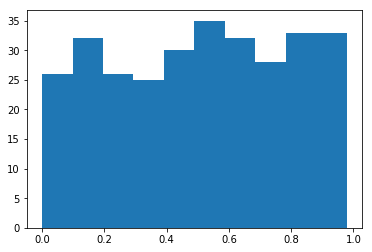

In [52]:
plt.hist(embedding_matrix[0])

In [0]:
embedding_matrix = (embedding_matrix - 0.5) * 4

(array([26., 32., 26., 25., 30., 35., 32., 28., 33., 33.]),
 array([-1.99803182, -1.60707296, -1.21611411, -0.82515525, -0.4341964 ,
        -0.04323754,  0.34772132,  0.73868017,  1.12963903,  1.52059789,
         1.91155674]),
 <a list of 10 Patch objects>)

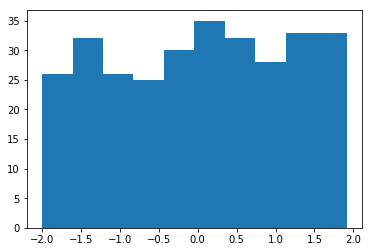

In [54]:
plt.hist(embedding_matrix[0])

In [0]:
for word, i in list(tokenizer.word_index.items())[:num_words]:
  try:
    embedding_vector = nlp.vocab[word].vector
    embedding_matrix[i] = embedding_vector
  except:
    pass

In [56]:
embedding_matrix[:10]

array([[-1.88792348e+00,  1.39129058e+00, -1.19681162e+00, ...,
         1.48329094e+00, -1.74304044e+00,  1.86039281e+00],
       [ 2.72040009e-01, -6.20299987e-02, -1.88400000e-01, ...,
         1.30150005e-01, -1.83170006e-01,  1.32300004e-01],
       [-1.85670003e-01,  6.60080016e-02, -2.52090007e-01, ...,
        -2.34520007e-02,  1.23020001e-01,  3.31200004e-01],
       ...,
       [ 1.82070002e-01, -2.15480000e-01, -1.03340000e-01, ...,
         9.85630006e-02,  2.98720002e-02, -1.80759996e-01],
       [ 8.91870037e-02,  2.57919997e-01,  2.62820005e-01, ...,
         1.44209996e-01, -1.69000000e-01,  2.65009999e-01],
       [ 1.36290002e-03,  3.56530011e-01, -5.54970019e-02, ...,
        -1.12369999e-01,  7.82589987e-02,  2.23979995e-01]])

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Embedding, Flatten, Dense, LSTM

In [0]:
units = 32

In [0]:
model = Sequential()

In [61]:
model.add(Embedding(num_words + 1, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         3000300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,042,957
Trainable params: 3,042,957
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])

In [0]:
model.layers[0].trainable = False

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [66]:
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 249s 10ms/step - loss: 0.4631 - acc: 0.7833 - val_loss: 0.3551 - val_acc: 0.8507
Epoch 2/10
25000/25000 [==============================] - 247s 10ms/step - loss: 0.3281 - acc: 0.8630 - val_loss: 0.3038 - val_acc: 0.8757
Epoch 3/10
25000/25000 [==============================] - 248s 10ms/step - loss: 0.2763 - acc: 0.8860 - val_loss: 0.2828 - val_acc: 0.8870
Epoch 4/10
25000/25000 [==============================] - 251s 10ms/step - loss: 0.2494 - acc: 0.8996 - val_loss: 0.2590 - val_acc: 0.8958
Epoch 5/10
25000/25000 [==============================] - 253s 10ms/step - loss: 0.2260 - acc: 0.9119 - val_loss: 0.2515 - val_acc: 0.8984
Epoch 6/10
25000/25000 [==============================] - 252s 10ms/step - loss: 0.2038 - acc: 0.9204 - val_loss: 0.2470 - val_acc: 0.8977
Epoch 7/10
25000/25000 [==============================] - 251s 10ms/